- Loading Libraries and Datasets

In [5]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel(r'Datasets\June_2025_Sprint_tracker_template.xlsx')
df.head()

,NAME,COMPANY,EMAIL,SOURCE,STATUS,NEXT STEP,NOTES,Phone Number,Website,LINKEDIN
0,Aamir Ashraf,Dotcomsourcing provides remote staffing services,NaN,NaN,NaN,NaN,"Needs Help Automating Digital Marketing, softw...",1 (214) 940-6366,http://dotcomsourcing.com,NaN
1,Ashwin Kalkar,Info-Tech Research Group - I lead Strategic Pr...,NaN,NaN,NaN,NaN,"Salesforce Product delivery with Agentforce, A...",1 (647) 894-6132,http://infotech.com,NaN
2,Dr Naledi Gallant (PhD),NNAKKI: on-demand beauty mobile app,naledi@dalitso.co.za,NaN,NaN,NaN,"Client Matching & Service Recommendations, Sma...",27 82 870 7811,http://www.nnakki.com,NaN
3,Lou Severine,HousMthr - Co-Founder of a Co-Pilot Travel App,lou@housmthr.com,NaN,NaN,NaN,Our Travel Co-Pilot App,NaN,http://housmthr.com,NaN
4,Dev Roy,IntraIntel.ai is a precision AI platform that ...,dev.roy@intraintel.ai,NaN,NaN,NaN,We’re automating the most expensive and error-...,1 (703) 984-9981,https://intraintel.ai,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NAME          9 non-null      object 
 1   COMPANY       9 non-null      object 
 2   EMAIL         7 non-null      object 
 3   SOURCE        0 non-null      float64
 4   STATUS        0 non-null      float64
 5   NEXT STEP     0 non-null      float64
 6   NOTES         9 non-null      object 
 7   Phone Number  6 non-null      object 
 8   Website       8 non-null      object 
 9   LINKEDIN      1 non-null      object 
dtypes: float64(3), object(7)
memory usage: 852.0+ bytes


- Data Cleanup

In [7]:
# 1️⃣ Remove columns that are completely empty
df_cleaned = df.dropna(axis=1, how='all')

# 2️⃣ Standardize column names (lowercase, underscores, no trailing spaces)
df_cleaned.columns = (
    df_cleaned.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

# 3️⃣ Fill missing values with "Not Provided"
df_cleaned = df_cleaned.fillna('Not Provided')

# 4️⃣ Strip extra spaces in text columns
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].astype(str).str.strip()

# 5️⃣ Standardize phone numbers (digits only, keep "Not Provided")
df_cleaned['phone_number'] = df_cleaned['phone_number'].apply(
    lambda x: ''.join(filter(str.isdigit, x)) if x != "Not Provided" else x
)

# 6️⃣ Validate emails (basic format check)
def validate_email(email):
    if email == "Not Provided":
        return email
    return email if re.match(r"[^@]+@[^@]+\.[^@]+", email) else "Invalid"

df_cleaned['email'] = df_cleaned['email'].apply(validate_email)


- Feature Engineering

In [8]:
def categorize_expectation(note):
    note_lower = note.lower()
    if "automating" in note_lower and "clinical trial" in note_lower:
        return "Healthcare & Clinical Trial Automation"
    elif "automating" in note_lower or "digital marketing" in note_lower or "software development" in note_lower:
        return "Automation & Digital Transformation"
    elif "salesforce" in note_lower or "agentforce" in note_lower:
        return "CRM & AI Solutions"
    elif "travel" in note_lower:
        return "Travel Tech Solutions"
    elif "dashboard" in note_lower:
        return "Data Dashboards & Analytics"
    elif "feedback" in note_lower and "develop" in note_lower:
        return "User Feedback & Feature Development"
    elif "product" in note_lower:
        return "Product Development"
    elif "client matching" in note_lower or "scheduling" in note_lower or "chatbots" in note_lower or "pricing" in note_lower:
        return "Business Process Optimization"
    else:
        return "Other"

df_cleaned['expectation_category'] = df_cleaned['notes'].apply(categorize_expectation)

In [9]:
df_cleaned['expectation_category']

0       Automation & Digital Transformation
1                        CRM & AI Solutions
2             Business Process Optimization
3                     Travel Tech Solutions
4    Healthcare & Clinical Trial Automation
5               Data Dashboards & Analytics
6                       Product Development
7                       Product Development
8       User Feedback & Feature Development
Name: expectation_category, dtype: object

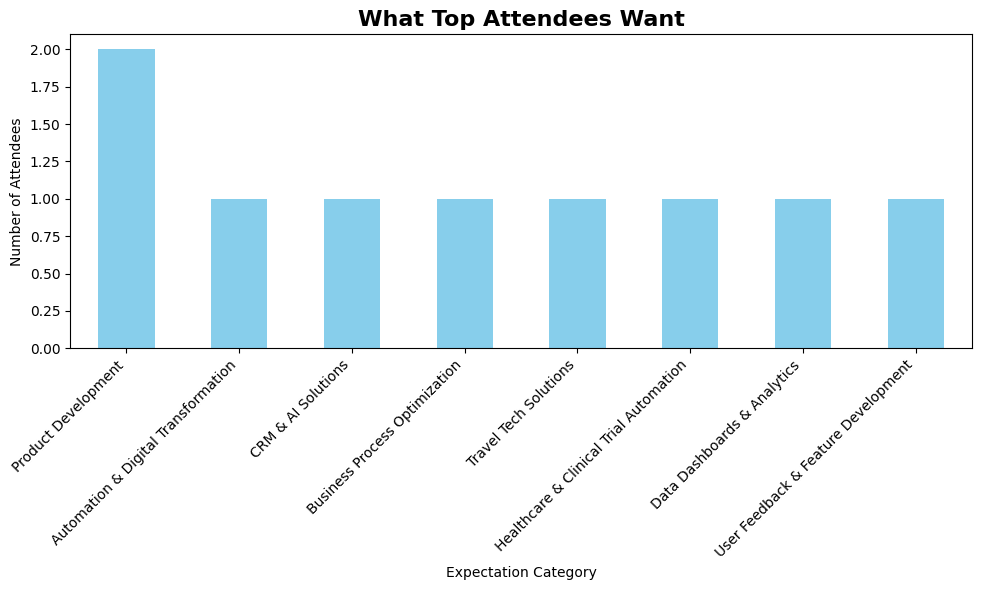

In [10]:
# Count categories and sort
category_counts = df_cleaned['expectation_category'].value_counts().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title("What Top Attendees Want", fontsize=16, fontweight='bold')
plt.xlabel("Expectation Category")
plt.ylabel("Number of Attendees")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Images/Attendees_Wants.png')
plt.show()